In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=yf.download("BTC-EUR",start='2010-01-01') #df
# df.Close.rolling?

[*********************100%***********************]  1 of 1 completed


In [3]:
def strategy(df,sma1,sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change()+1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position']= np.where(df['SMA1'] > df['SMA2'],1,0)
    df['stratret']= df['position'].shift(1)*df['ret']
    df['position2']= np.where(df['SMA1'] == df['SMA2'],1,0)
    df.dropna()
    return df
#df
obj = strategy(df,20,50)
diff = obj.SMA1-obj.SMA2
cross = np.sign(diff.shift(1))!=np.sign(diff)
cross
# for i in cross:
#     if i == True:
#         print(i)
#np.sum(cross)-1


Date
2019-11-06     True
2019-11-07    False
2019-11-08    False
2019-11-09    False
2019-11-10    False
              ...  
2021-08-23    False
2021-08-24    False
2021-08-25    False
2021-08-26    False
2021-08-27    False
Length: 657, dtype: bool

In [4]:
def performance(df):
     return np.exp(df[['ret','stratret']].sum())

In [5]:
performance(strategy(df,20,50))

ret         4.846911
stratret    5.131884
dtype: float64

In [6]:
stratdf = strategy(df,20,50)

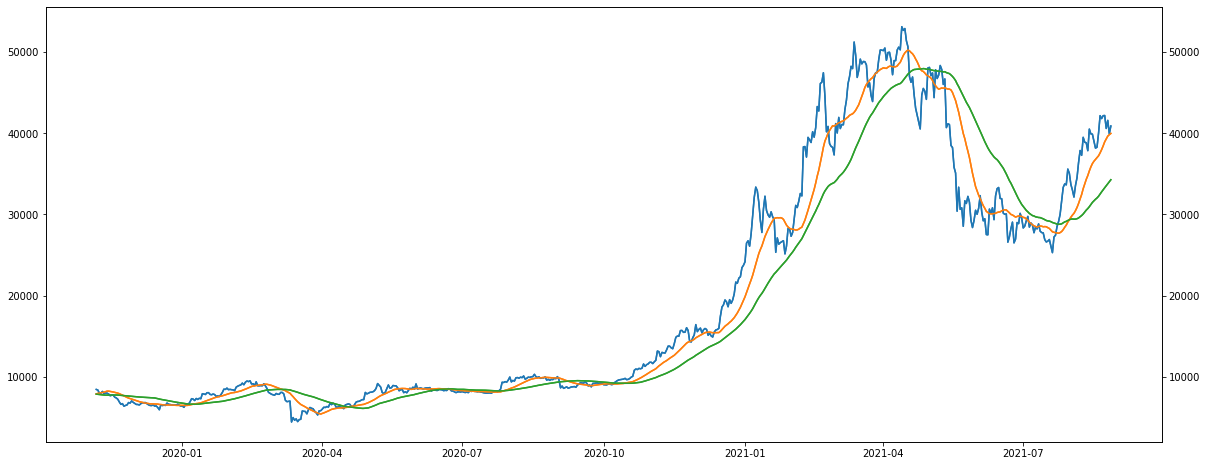

In [7]:
fig,ax = plt.subplots(figsize=(20,8))
ax2=ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf[['Close','SMA1','SMA2']])